# Первое задание (до 27 февраля)

In [2]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, neighbors 
import numpy as np

%pylab inline

# random state
rs = 42

Populating the interactive namespace from numpy and matplotlib


## 1 Метод k ближайших соседей
    10% баллов за задание, оценочное время выполнения: 20 минут
Сгенерируйте обучающую выборку из описанных двумя признаками объектов нескольких
классов и визуализируйте разделяющие поверхности, получаемые при решении задачи клас-
сифкации методом k ближайших соседей для разных k. Попробуйте подобрать оптимальное
значение количества соседей k с помощью 5-fold cross-validation, построив график зависимо-
сти accuracy в кросс-валидации от k.

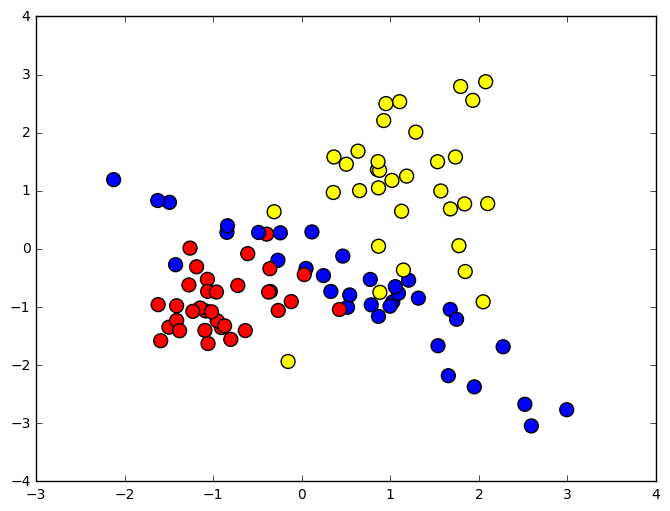

In [3]:
# Шаг 0. Генерируем обучающую выборку и визуализируем данные.  
classification_problem = datasets.make_classification(n_samples=100, n_features =2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=rs)

colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=100)

In [4]:
# Шаг 1. Делим дынные на train & test.
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = rs)

# Шаг 2. Вводим вспомогательные функции для визуализации разделяющих поверхностей.

def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))    

Шаг 3. Визуализируем решающие кривые для разных k

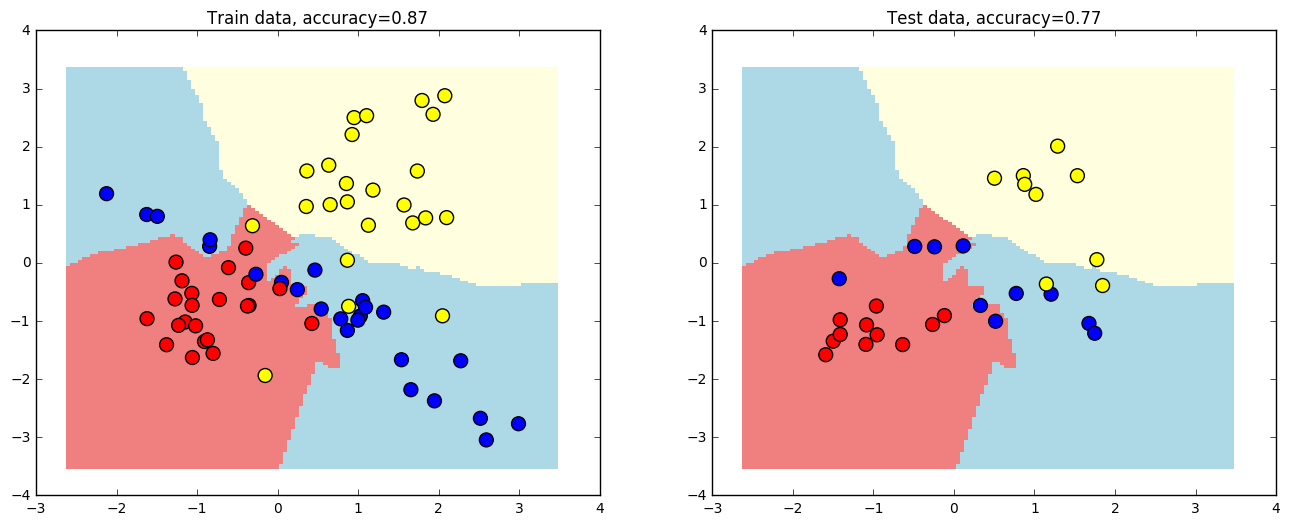

In [5]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

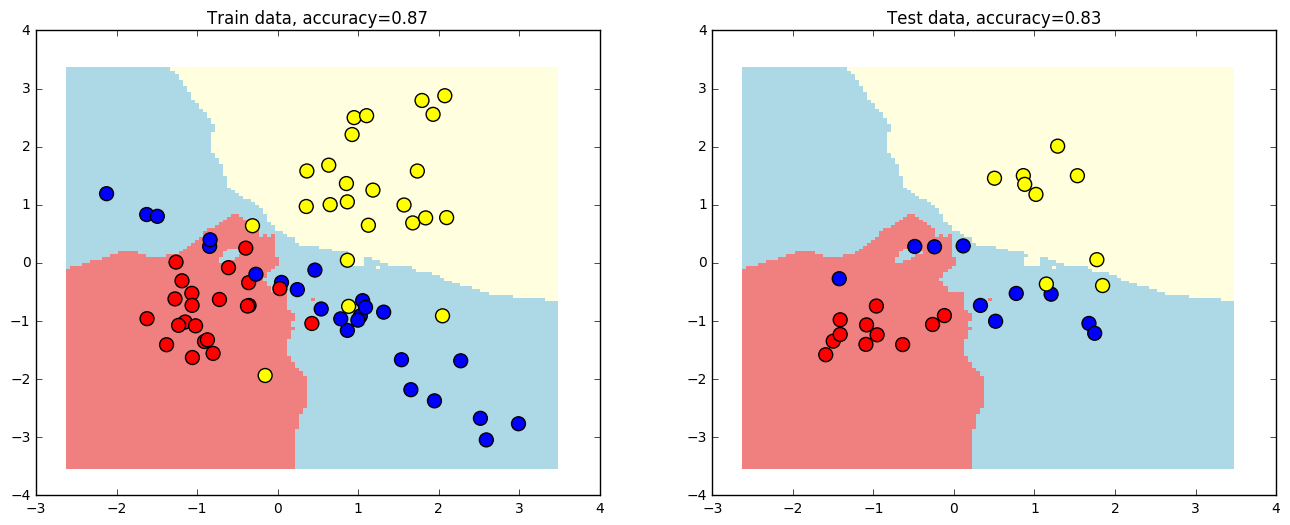

In [6]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

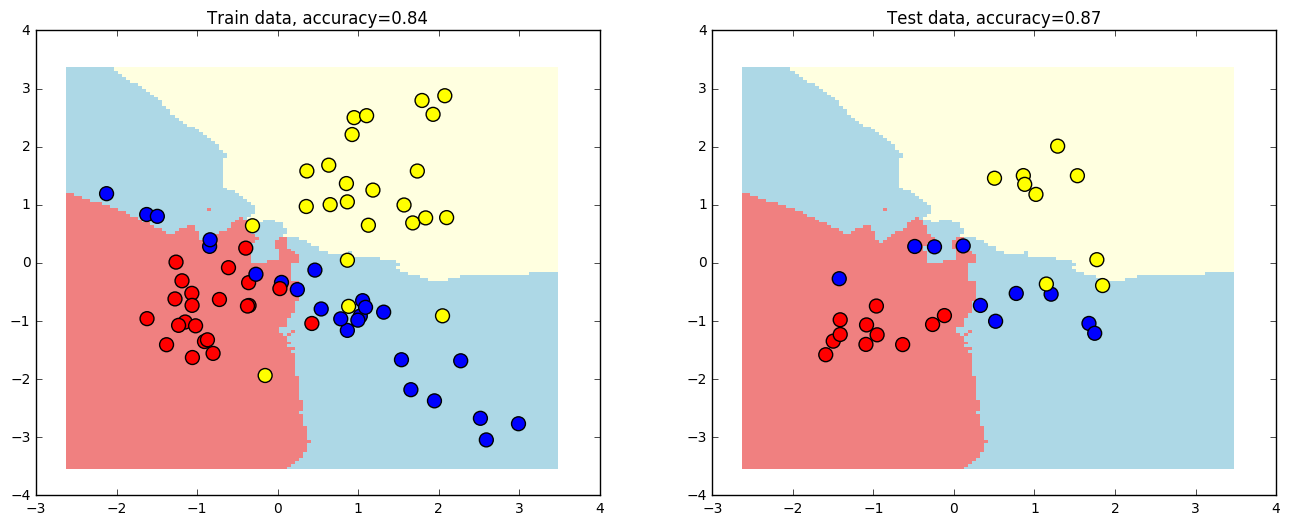

In [7]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

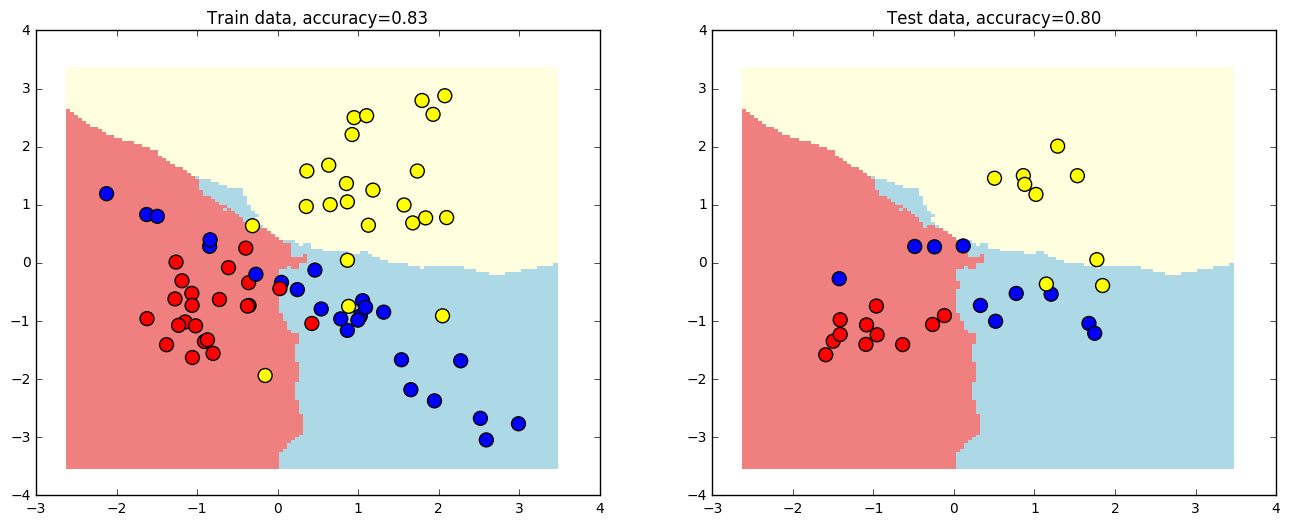

In [8]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=20)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

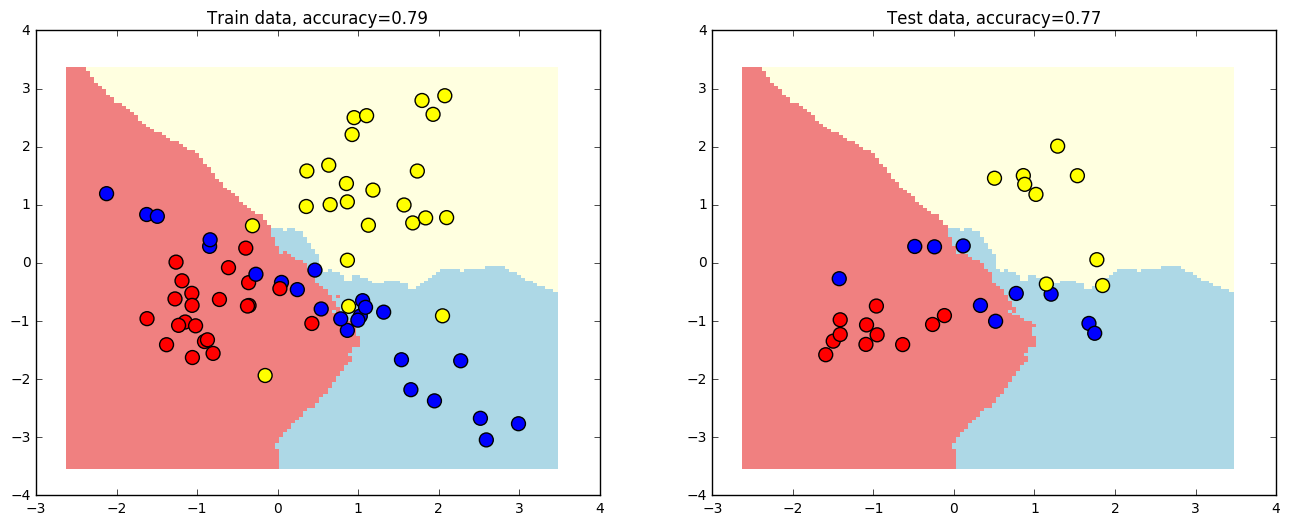

In [9]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=40)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

Шаг 4. Подберем оптимальное значение ближайших соседей k.

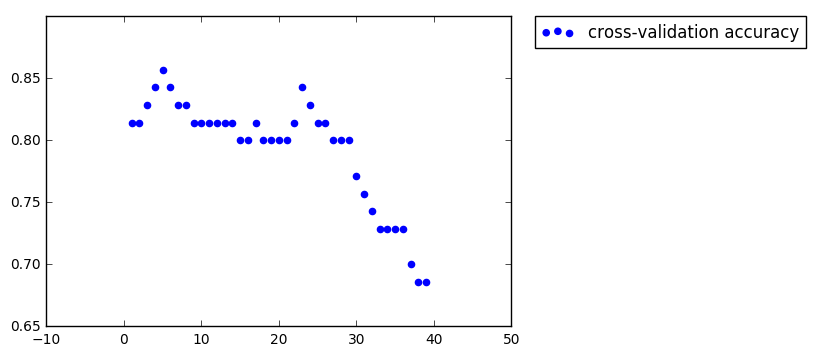

Оптимальное заначение k - 5


In [11]:
# качество на кросс-валидации
cr_acc = []
test_acc = []
    
for k in range(1,40):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
    kf = model_selection.KFold(n_splits = 5)
    cr_acc.append(mean(model_selection.cross_val_score(estimator, train_data, train_labels, cv = kf)))

plt.scatter(x = range(1,40), y = cr_acc, color = "blue", label = "cross-validation accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print "Оптимальное заначение k - {0}".format(argmax(cr_acc)+1)

## 2 Наивный байесовский классификатор
    20% баллов за задание, оценочное время выполнения: 40 минут
Загрузите датасеты digits и breast_cancer из sklearn.datasets. Выведите несколько строчек
из обучающих выборок и посмотрите на признаки. С помощью sklearn.model_selection.cross_val_score
c настройками по умолчанию и вызова метода mean() у возвращаемого этой функцией numpy.ndarray,
сравните качество работы наивных байесовских классификаторов на этих двух датасетах. Для
сравнения предлагается использовать BernoulliNB, MultinomialNB и GaussianNB. Насколько
полученные результаты согласуются с вашими ожиданиями?
Два датасета, конечно, еще не повод делать далеко идущие выводы, но при желании вы
можете продолжить исследование на других выборках (например, из UCI репозитория).
Ответьте (прямо в ipynb блокноте с вашими экспериментами) на вопросы:
1. Каким получилось максимальное качество классификации на датасете breast_cancer?
2. Каким получилось максимальное качество классификации на датасете digits?
3. Какие утверждения из приведенных ниже верны?
(a) На вещественных признаках лучше всего сработал наивный байесовский класси-
фикатор с распределением Бернулли
(b) На вещественных признаках лучше всего сработал наивный байесовский класси-
фикатор с мультиномиальным распределением
(c) Мультиномиальное распределение лучше показало себя на выборке с целыми неот-
рицательными значениями признаков
(d) На вещественных признаках лучше всего сработало нормальное распределение

In [14]:
from sklearn.datasets import load_breast_cancer, load_digits
from pandas import DataFrame

Шаг 0. Загружаем датасеты.

In [15]:
cancer = load_breast_cancer()
print cancer.keys()
print cancer.data.shape
print cancer.DESCR

['target_names', 'data', 'target', 'DESCR', 'feature_names']
(569, 30)
Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Rad

Данные имеют табличную структуру, их удобно визуализировать с помощью pandas.

In [16]:
cancer_frame = DataFrame(cancer.data)
cancer_frame.columns = cancer.feature_names
cancer_frame['target'] = cancer.target
cancer_frame['target_name'] = cancer_frame.target.apply(lambda x : cancer.target_names[x])

In [17]:
cancer_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [18]:
digits = load_digits()
print digits.keys()
print digits.images.shape
print digits.DESCR

['images', 'data', 'target_names', 'DESCR', 'target']
(1797, 8, 8)
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each b

Изображения из датасета digits визуализируем при помощи matplotlib.

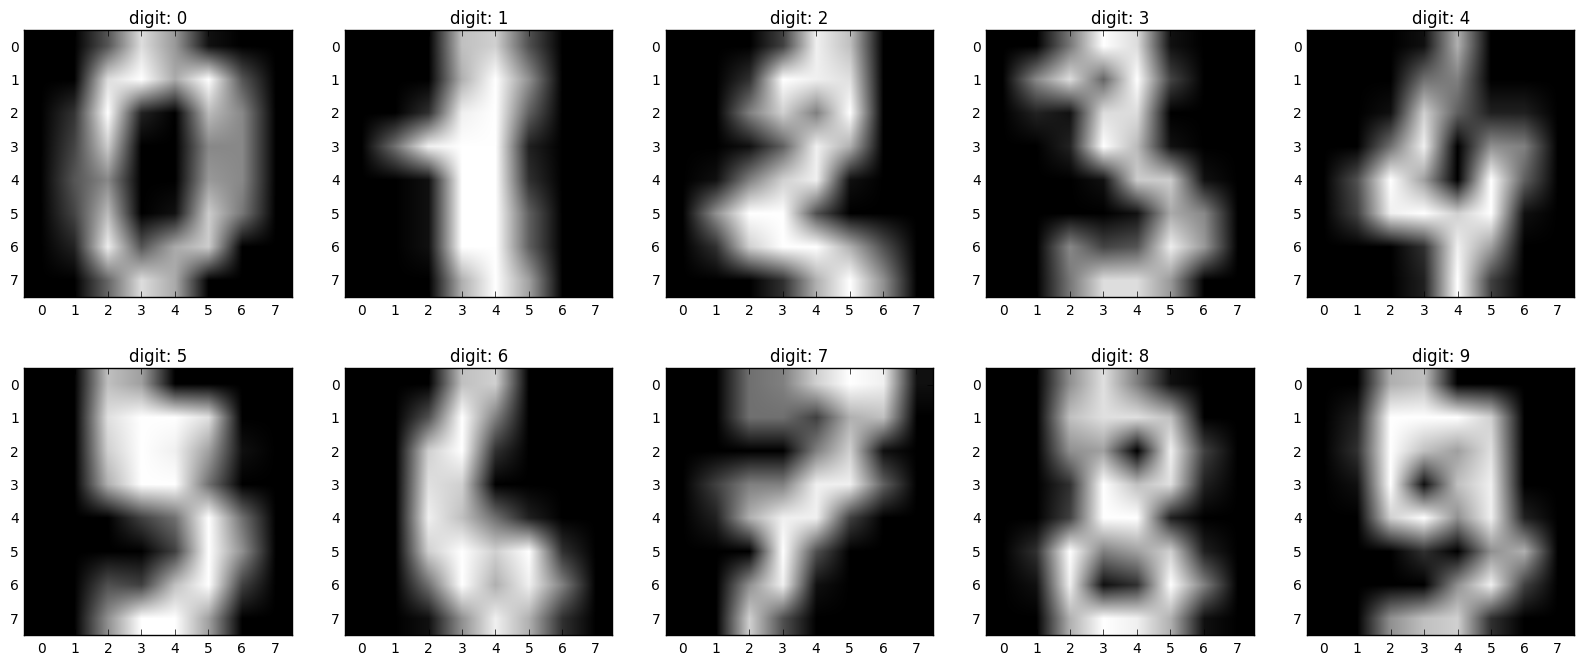

In [19]:
plt.figure(figsize = (20, 8))

for plot_number, plot in enumerate(digits.images[:10]):
    plt.subplot(2, 5, plot_number + 1)
    plt.imshow(plot, cmap = 'gray')
    plt.title('digit: ' + str(digits.target[plot_number]))

Шаг 1. Импортируем классификаторы.

In [35]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

In [36]:
bnb = BernoulliNB()
y_pred = bnb.fit(cancer.data, cancer.target).predict(cancer.data)
print("Number of mislabeled points out of a total %d points : %d" 
      % (cancer.data.shape[0], (cancer.target != y_pred).sum()))

print("Accuracy with BernoulliNB using cross_val_score: %f" % 
      mean(model_selection.cross_val_score(bnb, cancer.data, cancer.target)))

Number of mislabeled points out of a total 569 points : 212
Accuracy with BernoulliNB using cross_val_score: 0.627420


In [37]:
mnb = MultinomialNB()
y_pred = mnb.fit(cancer.data, cancer.target).predict(cancer.data)
print("Number of mislabeled points out of a total %d points : %d" 
      % (cancer.data.shape[0], (cancer.target != y_pred).sum()))

print("Accuracy with MultinomialNB using cross_val_score: %f" % 
      mean(model_selection.cross_val_score(mnb, cancer.data, cancer.target)))

Number of mislabeled points out of a total 569 points : 59
Accuracy with MultinomialNB using cross_val_score: 0.894579


In [38]:
gnb = GaussianNB()
y_pred = gnb.fit(cancer.data, cancer.target).predict(cancer.data)
print("Number of mislabeled points out of a total %d points : %d" 
      % (cancer.data.shape[0], (cancer.target != y_pred).sum()))

print("Accuracy with GaussianNB using cross_val_score: %f" % 
      mean(model_selection.cross_val_score(gnb, cancer.data, cancer.target)))

Number of mislabeled points out of a total 569 points : 33
Accuracy with GaussianNB using cross_val_score: 0.936749


### Ответы на вопросы:

1. Каким получилось максимальное качество классификации на датасете breast_cancer?


2. Каким получилось максимальное качество классификации на датасете digits?


3. Какие утверждения из приведенных ниже верны?


(a) На вещественных признаках лучше всего сработал наивный байесовский класси-
фикатор с распределением Бернулли


(b) На вещественных признаках лучше всего сработал наивный байесовский класси-
фикатор с мультиномиальным распределением


(c) Мультиномиальное распределение лучше показало себя на выборке с целыми неот-
рицательными значениями признаков


(d) На вещественных признаках лучше всего сработало нормальное распределение


## 3 Метрики в задаче регрессии
    40% баллов за задание, оценочное время выполнения: 120 минут
Сгенерируйте датасет из 500 точек на плоскости, для которых y = 0.5x + 1 + ", где "
распределено нормально с матожиданием 0 и дисперсией 0.2.
1. Визуализируйте выборку.
2. Восстановите по выборке зависимость y(x), считая, что зависимость имеет вид y = kx+b,
и минимизируя MSE на обучающей выборке, воспользовавшись scipy.optimize.minimize.
Визуализируйте восстановленную прямую.
3. Добавьте теперь в выборку 75 точек, для которых y = 1 + ", а x принимает различные
значения из того же диапазона, что и у уже имевшихся точек в обучающей выборке. По
новой расширенной выборке снова попробуйте восстановить зависимость y(x) = kx + b
двумя способами: минимизируя MSE и минимизируя MAE. Визуализируйте полученные
прямые.
4. На основе полученных графиков сделайте вывод об устойчивости моделей, оптимизи-
рующих MSE и MAE к выбросам.

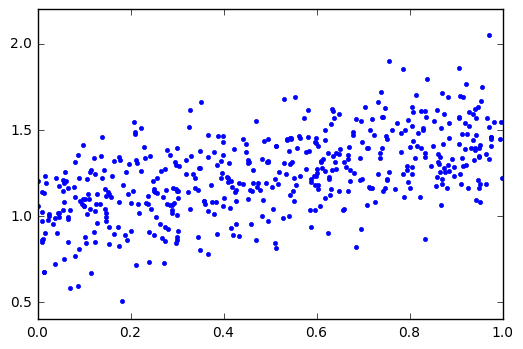

In [104]:
X = np.random.uniform(0, 1, 500)
Y = 0.5 * X + 1 + 0.2 * np.random.randn(500)
plt.plot(X,Y, '.')

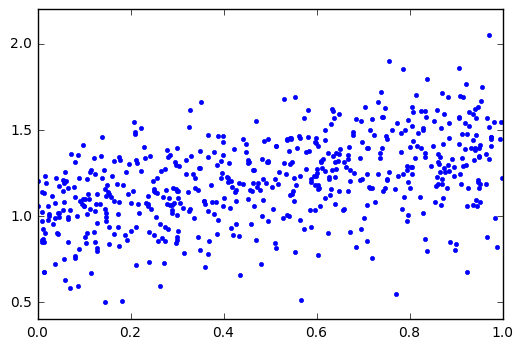

In [108]:
X_d = np.concatenate((X, np.random.uniform(0, 1, 75)))
distortion = 1 + 0.2 * np.random.randn(75)
Y_d = np.concatenate((Y, distortion))
plt.plot(X_d,Y_d, '.')

In [ ]:
MSE = 